> Support Vector Machine

- Support Vector Machine은 모델이다.
- hyperparameter는 C와 gamma
- 주로 사용하는 손실함수는 힌지손실 Hinge Loss

Reference : [핸즈 온 머신러닝](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/), [머신러닝 도감](https://jpub.tistory.com/992), [사이킷런 홈페이지](https://scikit-learn.org/stable/modules/svm.html)

**힌지 손실 Hinge Loss**

- $max(0,1-t)$ function
- $t=1$에서 미분가능하지 않지만 $t=1$에서 서브그레디언트로 경사 하강법 사용

# 1. 선형 SVM 분류

- 클래스가 선형으로 분류될 때
- 클래스 분류의 경계에 있는 샘플 = 서포트 벡터


## 2) 하드 마진 분류

- 클래스 분류의 경계에 샘플이 없을 때 = 마진 오류가 하나도 없을때, 하드 마진 분류

    - 선형적으로 구분되어야 함
    - 이상치에 민감함

이 떄 생기는 이상치를 마진 오류로 본다.

- 이상치 $\to$ 클래스 구분했을때 그어지는 선에 걸쳐지는 값들 $\to$ 마진 오류  margin violation

적절한 균형 잡는 것이 필요

## 1) 소프트 마진 분류

소프트 마진 분류 필요한 이유.

- hyper parameter C가 너무 크면 과대적합 가능성 존재

손실함수는 [힌지 손실 Hinge Loss](https://en.wikipedia.org/wiki/Hinge_loss)

- 주로 SVM과 함께 쓰임. $max(0,1-y), max(0,1+y)$ 로 $y$의 범위가 [-1,1]에 오도록 함

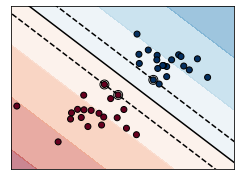

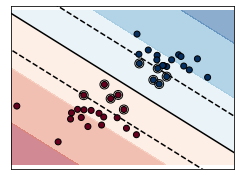

In [2]:
#| echo: false
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import svm

# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# figure number
fignum = 1

# fit the model
for name, penalty in (("unreg", 1), ("reg", 0.05)):

    clf = svm.SVC(kernel="linear", C=penalty)
    clf.fit(X, Y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_**2))
    yy_down = yy - np.sqrt(1 + a**2) * margin
    yy_up = yy + np.sqrt(1 + a**2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, "k-")
    plt.plot(xx, yy_down, "k--")
    plt.plot(xx, yy_up, "k--")

    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k",
        cmap=cm.get_cmap("RdBu"),
    )
    plt.scatter(
        X[:, 0], X[:, 1], c=Y, zorder=10, cmap=cm.get_cmap("RdBu"), edgecolors="k"
    )

    plt.axis("tight")
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Put the result into a contour plot
    plt.contourf(XX, YY, Z, cmap=cm.get_cmap("RdBu"), alpha=0.5, linestyles=["-"])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

* 위처럼 선에 걸친게 마진 오류 margin violation

# 2. 비선형 SVM 분류

- 선형적으로 분류할 수 없는 데이터셋에 한해서, 2차, 3차,.. 등

## 1) 다항식 커널

- 다항식은 잘 작동하기는 한데 설명변수가 너무 많아지면 오히려 모델을 느리게 만들어서 안 좋아..

## 2) 유사도 특성

- 특정 랜드마크와 얼마나 닮았는지 유사도 함수 similarity function = similarity measure =  similarity metric 로 계산^[a real-valued function that quantifies the similarity between two objects]
    - 특정 랜드마크 -> 특징인건가..

[유사도 함수의 종류](https://en.wikipedia.org/wiki/Similarity_measure)

- 유클리디안 거리 Euclidean Distance ; 모든 속성 고려
- [코사인 유사도 Cosine Similarity](https://en.wikipedia.org/wiki/Cosine_similarity) ; 각으로 고려; -1~1사이
- 마할라라비스 거리 ; 값들 사이의 공분산 이용
- 민코스키 거리 Minkowski Distance ; 가장 큰 값만 고려

## 3) 가우시안 RBF 커널

- [Gaussian Radical Basis Function = Gaussian Kernel](https://en.wikipedia.org/wiki/Radial_basis_function_kernel)

## 4) 계산 복잡도

$O(m\times n)$

computational complexity theory

# 3. SVM 회귀

SVM은 선형, 비선형 분류 뿐만 아니라 선형, 비선형 회귀에도 사용

- 마진을 크게하든지(오른쪽) 작게하든지(왼쪽) 영향을 받지 않는다면, 민감하지 않다고 표현

![image.png](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcToqCwuryPQlMv-e3VZElBUqIHrJozxH0j19w&usqp=CAU)

# 4. SVM 이론

## 1) 결정 함수와 예측

**선형 SVM을 훈련한다 = 마진 오류를 하나도 발생하지 않거나(하드 마진) 제한적인 마진 오류를 가지면서(소프트 마진) 가능한 한 마진을 크게 하는 $\mathbb{w}$와 $b$를 찾는 것**

단순히 선형 회귀식 계산해서 0인지 1인지를 나눈다.

$\hat{y} = \begin{cases} 0 & \mathbb{w}^\top \mathbb{x} + b < 0 \text{ 일 때} \\ 1 & \mathbb{w}^\top \mathbb{x} + b \ge 0 \text{ 일 때} \end{cases}$

## 2) 목적 함수

결정 함수의 기울기는 가중치 벡터의 노름 $||w||$와 같다.

- 마진 크게 = $||w||$ 최소화

하드 마진 선형 SVM 분류기의 목적 함수

$minimize_{w,b} \frac{1}{2} \mathbb{w^\top w}$

$\star$ 왜 $\frac{1}{2} \mathbb{w^\top w}$? $||w||$는 $w=0$에서 미분도 되지 않음

소프트 마진 선형 SVM 분류기의 목적 함수

- 슬랙 변수 slack variable $\zeta^{(i)} \ge 0$ 도입

마진 오류 최소화 방법

1. 슬랙 변수 값을 작게 만들기
2. 마진 크게 하기 위해 $\frac{1}{2} \mathbb{w^\top w}$ 최소화

$minimize_{w,b,\zeta} \frac{1}{2} \mathbb{w^\top w} + C \sum^m_{i=1}\zeta^{(i)}$

$\star$ hyper parameter $C$ $\to$ 두 목표object 사이의 트레이드 오프 정의

## 3) 콰드라틱 프로그래밍

콰드라틱 프로그래밍 Quadratic Programming, QP = 하드 마진과 소프트 마진 문제는 모두 선형적인 제약 조건이 있는 볼록 함수의 이차 최적화 문제

## 4) 쌍대 문제

## 5) 커널 SVM

원래 선형 분리할 수 없는 데이터를 선형 분리함

$\star$ 가우시안 커널이 복잡한 결정 경게를 학습한다고 데이터에 무조건 비선형 커널 기법을 적용하지 말고(분석에 의미가 없을 수 있음), 선형 커널을 이용한 분석으로 확린 후 커널 함수를 적용한 분석을 하는 것이 좋음

![image](https://miro.medium.com/v2/resize:fit:838/1*gXvhD4IomaC9Jb37tzDUVg.png)

커널의 종류

- 선형 커널 linear kernel [예시, 선형, 비선형 포함](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py)
    - $<x,x'>$
- 시그모이드 커널 sigmoid kernel
    - $\tanh(\gamma<x,x'>+r)$
    - where $r$ is specified by `coef0`.
- 다항 커널 polynomial kernel
    - $(\gamma<x,x'> + r)^d$
    - where $d$ is specified by parameter `degree`, $r$ by `coef0`.
- RBF 커널 = 가우시안 커널 rbf kernel
    - $exp(-\gamma||x - x'||^2)$
    - where $r$ is specified by parameter `gamma`, must be grater than 0
        - 복잡한 결정 경계 다룰때 좋을 듯

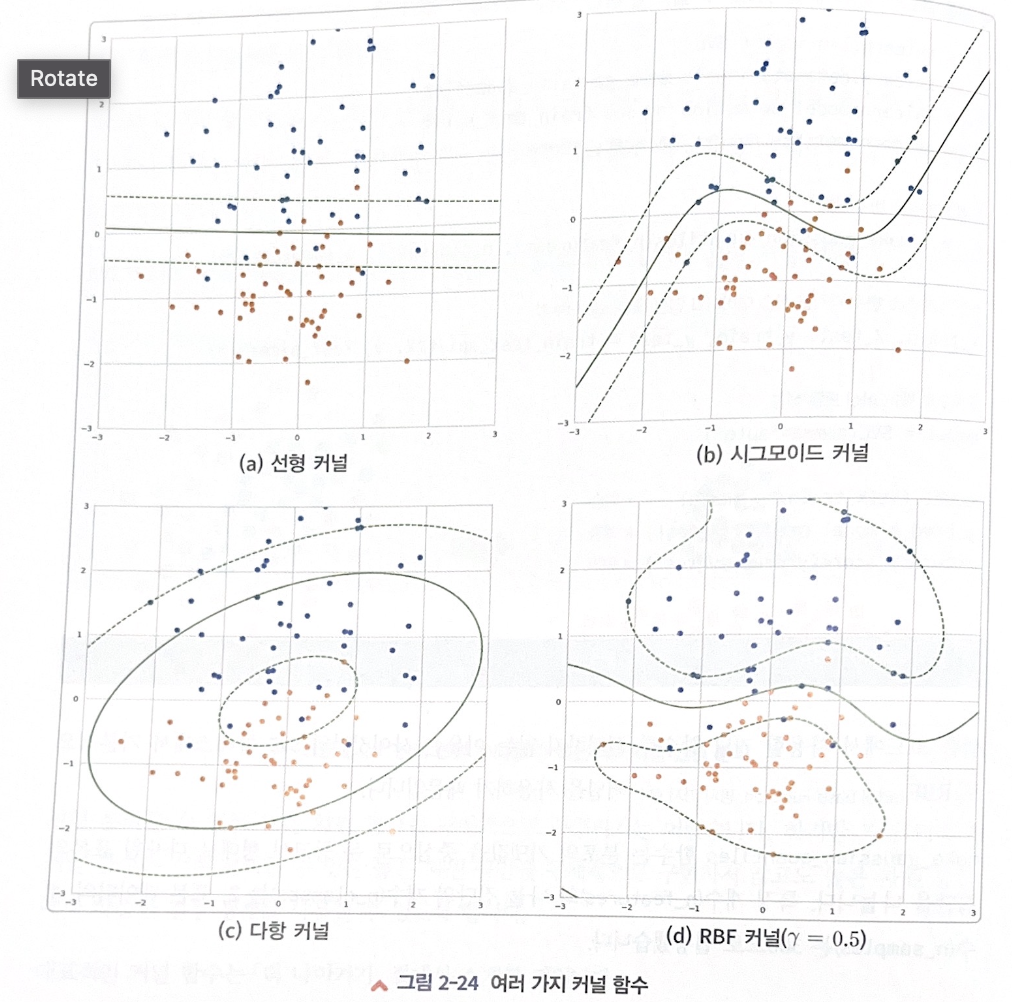

쓰는 법
```python
linear_svc = svm.SVC(kernel='linear')
linear_svc.kernel
```
선형 커널
```python
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.kernel
```
rbf 커널

## 6) 온라인 SVM